In [ ]:
!pip install kaggle
from google.colab import files 
#files.open('/content/drive/MyDrive/Colab Notebooks/json kaggle')
files.upload() #download and upload json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d merahul28/covid19-vaccine-related-tweets

covid19-vaccine-related-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d ritesh2000/covid19-vaccine-tweets

covid19-vaccine-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name= "covid19-vaccine-related-tweets.zip"

with ZipFile(file_name ,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   ###########
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.manifold import TSNE ######
from sklearn.feature_extraction.text import TfidfVectorizer #############

from keras.preprocessing.text import Tokenizer         #######
from keras.preprocessing.sequence import pad_sequences #######
from keras.models import Sequential
from keras.layers import Dropout , Conv1D ,MaxPool1D,Activation , Dense , Flatten , Embedding , LSTM ####

from keras import utils
from keras.callbacks import ReduceLROnPlateau , EarlyStopping


#nltk

import nltk
from nltk.corpus import stopwords ########
from nltk.stem import SnowballStemmer ############


#word to vec
import gensim

import re #####
import os
from collections import Counter #######
import logging ###
import time
import pickle ######
import itertools ######


from textblob import TextBlob # TextBlob - Python library for processing textual data
import random
np.random.seed(0)


# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
#load data 
df1 = pd.read_csv('/content/file.csv')
df2=pd.read_csv('/content/COVID-Vaccine Related tweets NOV1 to DEC16.csv')

In [ ]:
display(df2)

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686100,01-11-2020,07:35:53,1.336240e+08,vrtarak,viggy,@imeghanavirat Kadhu India dhi covaxin valu ip...,in,[],[],[],3,0,0,[],https://twitter.com/VRtarak/status/13227214928...
686101,01-11-2020,07:33:47,1.039760e+18,tv9bharatvarsh,TV9 Bharatvarsh,#Covaxin के तीसरे फेज का ट्रायल जल्द होगा शुरू...,hi,[],['https://www.tv9bharatvarsh.com/india/corona-...,[],0,0,15,"['covaxin', 'coronavirus', 'covid19']",https://twitter.com/TV9Bharatvarsh/status/1322...
686102,01-11-2020,07:26:19,1.336240e+08,vrtarak,viggy,@imeghanavirat Russia la vaccine odaladame at ...,in,[],[],[],1,0,0,[],https://twitter.com/VRtarak/status/13227190842...
686103,01-11-2020,07:02:32,1.238370e+18,covidmexico,Covid México,ste candidato ha entrado en ensayos de Fase 2....,es,[],[],[],1,1,0,[],https://twitter.com/CovidMexico/status/1322713...


In [ ]:
df2.columns

Index(['date', 'time', 'user_id', 'username', 'name', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'link'],
      dtype='object')

In [ ]:
df2.head()

,date,time,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link
0,16-12-2020,04:37:24,1.369881e+08,beforethestars,Andrea Davison,"Vegetarians here is a reason ""AZD1222 (ChAdOx1...",en,[],[],[],0,3,3,[],https://twitter.com/beforethestars/status/1338...
1,16-12-2020,04:03:02,1.458063e+09,artofhitech,Техно Ньюс !,AstraZeneca начинает клинические испытания вак...,ru,[],[],[],0,0,0,[],https://twitter.com/ArtOfHiTech/status/1338975...
2,16-12-2020,03:39:43,1.412535e+07,n6mac41717,Chuck Han,@ByLizC 1) Let's see what the US Phase III tri...,en,[],[],[],0,0,0,[],https://twitter.com/n6mac41717/status/13389695...
3,16-12-2020,03:30:18,3.312676e+09,codigofmx,codigof.mx,"El pasado 11 de diciembre, el laboratorio Astr...",es,[],['http://ow.ly/iu8o50CMlt5'],['https://pbs.twimg.com/media/EpT3hY_W8AM6C_x....,0,0,4,[],https://twitter.com/codigofmx/status/133896714...
4,16-12-2020,01:39:04,9.536980e+17,ae1tt,"Deborah A Nicholas, M.D.",@sabrigley @IncognitoNewt @thespybrief Yep. Pu...,en,[],['https://www.thelancet.com/journals/lancet/ar...,[],1,0,6,[],https://twitter.com/AE1TT/status/1338939149072...


In [ ]:
from pandas import datetime 

df2['date'] = pd.to_datetime(df2['date'])
df2['Month'] = df2['date'].dt.month
df2['Month-str-full'] = df2['date'].dt.strftime('%B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df2['Month-str-full'].value_counts()

November     235000
December     127569
October       61870
September     61747
August        39862
March         33318
February      31353
April         28618
May           21633
July          19290
June          14970
January       10875
Name: Month-str-full, dtype: int64

In [ ]:
print(min(df2['date']))
print(max(df2['date']))

2020-01-11 00:00:00
2020-12-16 00:00:00


In [ ]:
print(min(df1['date']))
print(max(df1['date']))

2020-02-12
2020-10-22


In [ ]:
df2 = df2[df2['language']=='en']
df2 = df2[['date' , 'tweet']]

In [ ]:
df1 = df1[df1['language']=='en']
df1 = df1[['date' , 'tweet']]

In [ ]:
df1.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
3,2020-10-22,@MisseeMonis They said vaccine for all but not...
4,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
5,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
df2.head()

,date,tweet
0,2020-12-16,"Vegetarians here is a reason ""AZD1222 (ChAdOx1..."
2,2020-12-16,@ByLizC 1) Let's see what the US Phase III tri...
4,2020-12-16,@sabrigley @IncognitoNewt @thespybrief Yep. Pu...
5,2020-12-16,@IncognitoNewt @thespybrief Lancet published i...
6,2020-12-16,AZD1222 Oxford Phase III trials interim analys...


In [ ]:

df2['tweet'].isna().sum()

0

In [ ]:
df2['date'].isna().sum()

0

In [ ]:
df1['tweet'].isna().sum()

0

In [ ]:
df1['date'].isna().sum()

0

In [ ]:
print(df1.shape)
print(df2.shape)

(201030, 2)
(573016, 2)


In [ ]:
data = pd.concat([df1,df2],ignore_index=True)
data.head()

,date,tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...


In [ ]:
data.shape

(774046, 2)

In [ ]:
data.drop_duplicates(subset=['tweet'])
data.shape

(774046, 2)

In [ ]:
data['process_tweet'] = data['tweet'].copy()
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,@ANI Isn't it the best poll promise ever?? Fre...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,Now states shall have wait for thier Vidhan Sa...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,@MisseeMonis They said vaccine for all but not...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...","BJP really presenting ""free COVID vaccine"" as ..."
4,2020-10-22,Another dose of daily miserablism from Planet ...,Another dose of daily miserablism from Planet ...


# Preprocessing the Tweet


In [ ]:
def clean_data(txt):
  txt = txt.lower()  # lowercase
  txt = re.sub(r'@[A-Za-z0-9_]+' , '' , txt)   #remove mentions
  txt = re.sub(r'#' , '' , txt) #remove hashtags
  txt = re.sub(r'RT : ','' , txt) # remove retweets
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , txt) #removes url
  txt = re.sub('\[.*?\]' , '' , txt) #remove square brackets
  txt = re.sub(r'[^\w\s]' , '' , txt) #remove puntuations
  txt = re.sub('\w*\d\w*' , '' ,txt) #removes words containig numbers
  txt = re.sub('\n' , '' ,txt) #remove new lines
 

  return txt


In [ ]:
data['process_tweet'] = data['process_tweet'].apply(clean_data)
data['process_tweet']

0          isnt it the best poll promise ever free covid...
1         now states shall have wait for thier vidhan sa...
2          they said vaccine for all but not when free c...
3         bjp really presenting free covid vaccine as a ...
4         another dose of daily miserablism from planet ...
                                ...                        
774041    covaxin has been developed in collaboration wi...
774042    bharat biotech is planning to launch its vacci...
774043     vaccine amu medical college to begin covaxin ...
774044    bharat biotech to launch covaxin in    india n...
774045    the aiims in delhi is likely to submit a propo...
Name: process_tweet, Length: 774046, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#removig stop words

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(txt):
  rmv_stpwords = [i for i in txt.split() if i not in stopwords]
  rmv_stpwords_join = ' '.join(rmv_stpwords)
  return rmv_stpwords_join

 

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(remove_stopwords)

data.head()#after removing stopwords

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promise ever free covid vaccine...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,states shall wait thier vidhan sabha election ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccine free covid vaccine new lakhs rs e...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp really presenting free covid vaccine state...
4,2020-10-22,Another dose of daily miserablism from Planet ...,another dose daily miserablism planet grauniad...


In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [ ]:
def stemming(txt):
  txt =[st.stem(word) for word in txt.split()]
  txt_join = ' '.join(txt)
  return txt_join

#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [ ]:
data['process_tweet'] = data['process_tweet'].apply(stemming)
data.head()

,date,tweet,process_tweet
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
!pip install vaderSentiment

In [ ]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data['Polarity_Vader'] = data['process_tweet'].apply(lambda txt: sid.polarity_scores(txt)['compound'])
data.head()

,date,tweet,process_tweet,Polarity_Vader
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404


# Labeling

5 labels: 
strongly positive,
positive,
nuteral,
negative,
strongly negetative.


In [ ]:

def get_text_polarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
#add 2 columns(subjectivity and polarity) to the data

#data['Subjectivity'] = data['process_tweet'].apply(get_text_subjectivity)

data['Polarity_textblob'] = data['process_tweet'].apply(get_text_polarity)

In [ ]:

#Labeling
def get_text_analysis(i):
  if (i<-0.5):
    return 'Strongly Negative'
  elif ((i<0 ) and (i >= -0.5)):
    return 'Negative'
  elif (i == 0):
    return 'Neutral'
  elif (i>0 and i<=0.5):
    return 'Positive'
  else:
    return 'Strongly Positive'



In [ ]:
data['Sentiment_TB'] = data['Polarity_textblob'].apply(get_text_analysis)
data['Sentiment_VADER'] = data['Polarity_Vader'].apply(get_text_analysis)

In [ ]:
data.head()

,date,tweet,process_tweet,Polarity_Vader,Polarity_textblob,Sentiment_TB,Sentiment_VADER
0,2020-10-22,@ANI Isn't it the best poll promise ever?? Fre...,isnt best poll promis ever free covid vaccin v...,-0.7482,0.197500,Positive,Strongly Negative
1,2020-10-22,Now states shall have wait for thier Vidhan Sa...,state shall wait thier vidhan sabha elect get ...,0.0000,0.800000,Strongly Positive,Neutral
2,2020-10-22,@MisseeMonis They said vaccine for all but not...,said vaccin free covid vaccin new lakh rs ever...,0.7717,0.378788,Positive,Strongly Positive
3,2020-10-22,"BJP really presenting ""free COVID vaccine"" as ...",bjp realli present free covid vaccin state man...,0.7964,0.500000,Positive,Strongly Positive
4,2020-10-22,Another dose of daily miserablism from Planet ...,anoth dose daili miserabl planet grauniad sub ...,0.4404,0.000000,Neutral,Positive


In [ ]:
possible_labels = data.Sentiment_TB.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_TB'] = data.Sentiment_TB.replace(label_dict)



In [ ]:
#possible_labels = data.Sentiment_VADER.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels): 
#The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
    label_dict[possible_label] = index

data['label_VD'] = data.Sentiment_VADER.replace(label_dict)


In [ ]:
possible_labels

array(['Positive', 'Strongly Positive', 'Neutral', 'Negative',
       'Strongly Negative'], dtype=object)

In [ ]:
df=data[['date','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data = data[['process_tweet','Sentiment_TB' ,'label_TB','Sentiment_VADER' ,'label_VD']]
data.head()



,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,isnt best poll promis ever free covid vaccin v...,Positive,0,Strongly Negative,4
1,state shall wait thier vidhan sabha elect get ...,Strongly Positive,1,Neutral,2
2,said vaccin free covid vaccin new lakh rs ever...,Positive,0,Strongly Positive,1
3,bjp realli present free covid vaccin state man...,Positive,0,Strongly Positive,1
4,anoth dose daili miserabl planet grauniad sub ...,Neutral,2,Positive,0


In [ ]:
from pandas import datetime 

df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month
df['Month-str-full'] = df['date'].dt.strftime('%B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [ ]:
possible_months = df['Month-str-full'].unique()
print(possible_labels)
print(possible_months)

['Positive' 'Strongly Positive' 'Neutral' 'Negative' 'Strongly Negative']
['October' 'September' 'August' 'July' 'June' 'May' 'April' 'March'
 'February' 'December' 'November' 'January']


In [ ]:
df.head()

,date,Sentiment_TB,label_TB,Sentiment_VADER,label_VD,Month,Month-str-full
0,2020-10-22,Positive,0,Strongly Negative,4,10,October
1,2020-10-22,Strongly Positive,1,Neutral,2,10,October
2,2020-10-22,Positive,0,Strongly Positive,1,10,October
3,2020-10-22,Positive,0,Strongly Positive,1,10,October
4,2020-10-22,Neutral,2,Positive,0,10,October


In [ ]:
df['Month-str-full'].value_counts()

November     194118
December     109639
September    106590
August        77587
October       76572
July          50109
April         33751
May           33423
March         29425
February      28447
June          25018
January        9367
Name: Month-str-full, dtype: int64

In [ ]:
data.to_csv('process_vaccine_tweet.csv')

In [ ]:
df_new = data.copy()

#df_new.rename(columns={'Sentiment' : 'Data'} , inplace= True)

df_new.head()

,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,isnt best poll promis ever free covid vaccin v...,Positive,0,Strongly Negative,4
1,state shall wait thier vidhan sabha elect get ...,Strongly Positive,1,Neutral,2
2,said vaccin free covid vaccin new lakh rs ever...,Positive,0,Strongly Positive,1
3,bjp realli present free covid vaccin state man...,Positive,0,Strongly Positive,1
4,anoth dose daili miserabl planet grauniad sub ...,Neutral,2,Positive,0


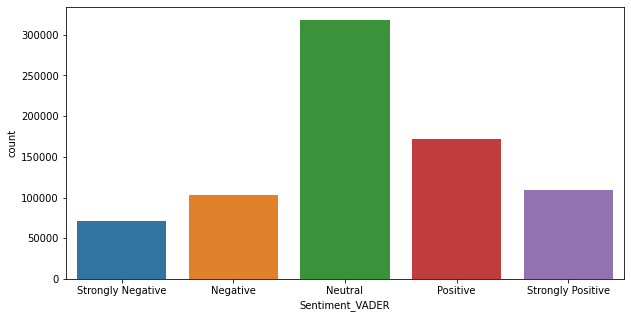

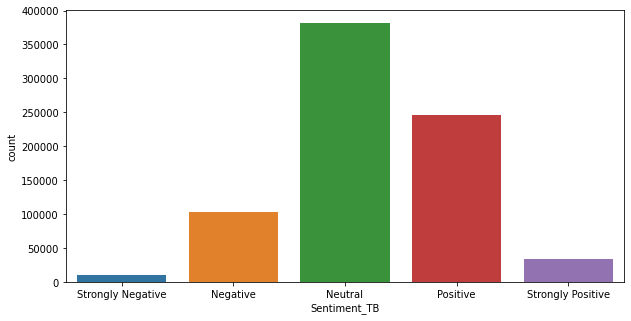

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment_VADER', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);




plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment_TB', data=df_new, order=['Strongly Negative' ,'Negative' , 'Neutral' , 'Positive' , 'Strongly Positive']);

In [ ]:
data.to_csv('Vaccine_Label_Data_Stream.csv')

Text(0, 0.5, 'Num of Tweet ')

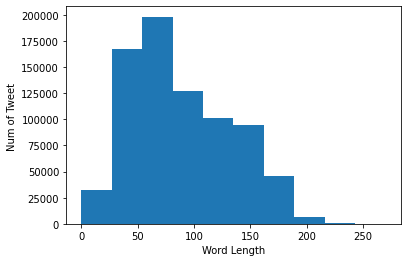

In [ ]:
data['process_tweet'].str.len().plot.hist()
plt.xlabel('Word Length')
plt.ylabel('Num of Tweet ')

In [ ]:
#import library for deep learning
from sklearn.model_selection import train_test_split


from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
data.head()

,process_tweet,Sentiment_TB,label_TB,Sentiment_VADER,label_VD
0,isnt best poll promis ever free covid vaccin v...,Positive,0,Strongly Negative,4
1,state shall wait thier vidhan sabha elect get ...,Strongly Positive,1,Neutral,2
2,said vaccin free covid vaccin new lakh rs ever...,Positive,0,Strongly Positive,1
3,bjp realli present free covid vaccin state man...,Positive,0,Strongly Positive,1
4,anoth dose daili miserabl planet grauniad sub ...,Neutral,2,Positive,0


# **FOR VADER ONLY**

In [ ]:

#for deep learning we need to only 2 colums(sentiment and process tweet)
data = data[['Sentiment_TB','process_tweet' ]]
data.head()

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data.copy()      #########    for experiment ,max_words

In [ ]:
data1.head()

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
data1 = data1.reset_index(drop=True) #for removing missig index 

#see previous index 3 is replaced by new index 2
data1.head() 

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...


In [ ]:
uniqueWords = list(set(" ".join(data['process_tweet']).lower().split(" ")))
count = len(uniqueWords)
print(count)

165769


In [ ]:
data1 = data.copy()    

data1.head()

,Sentiment_TB,process_tweet,label_TB
0,Positive,isnt best poll promis ever free covid vaccin v...,0
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...,1
2,Positive,said vaccin free covid vaccin new lakh rs ever...,0
3,Positive,bjp realli present free covid vaccin state man...,0
4,Neutral,anoth dose daili miserabl planet grauniad sub ...,2


In [ ]:
data1

,Sentiment_TB,process_tweet
0,Positive,isnt best poll promis ever free covid vaccin v...
1,Strongly Positive,state shall wait thier vidhan sabha elect get ...
2,Positive,said vaccin free covid vaccin new lakh rs ever...
3,Positive,bjp realli present free covid vaccin state man...
4,Neutral,anoth dose daili miserabl planet grauniad sub ...
...,...,...
774041,Neutral,covaxin develop collabor indian council medic ...
774042,Positive,bharat biotech plan launch vaccin call covaxin...
774043,Neutral,vaccin amu medic colleg begin covaxin trial no...
774044,Neutral,bharat biotech launch covaxin india news


In [ ]:
#algorithm

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1['process_tweet'], data1['label_TB'], test_size=0.2, stratify=data1['label_TB'])  #stratify##########

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

model.fit(X=tf_train,y=y_train)

expected = y_test
predicted=model.predict(tf_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     49205
           1       0.85      0.27      0.41      6814
           2       0.97      0.91      0.94     76309
           3       0.68      0.75      0.71     20489
           4       0.71      0.08      0.14      1993

    accuracy                           0.85    154810
   macro avg       0.80      0.59      0.61    154810
weighted avg       0.86      0.85      0.85    154810

[[45066   154   818  3160     7]
 [ 4731  1866   119    98     0]
 [ 3926   169 69793  2376    45]
 [ 4203     7   897 15369    13]
 [  108     1   161  1566   157]]


In [ ]:
#algorithm

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['process_tweet'], data['label_TB'], test_size=0.2, stratify=data['label_TB'])  #stratify##########

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built



In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=1, C=1e5 , multi_class='multinomial')
logreg.fit(X=tf_train,y=y_train)

expected = y_test
predicted=logreg.predict(tf_test)

lst_sentiment =[   'Negative','Neutral','Positive','Strongly Negative','Strongly Positive' ]
from sklearn import metrics

print(metrics.classification_report(expected, predicted, target_names=lst_sentiment))
print(metrics.confusion_matrix(expected, predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                   precision    recall  f1-score   support

         Negative       0.98      0.98      0.98     49205
          Neutral       0.94      0.94      0.94      6814
         Positive       1.00      0.99      1.00     76309
Strongly Negative       0.96      0.96      0.96     20489
Strongly Positive       0.88      0.87      0.87      1993

         accuracy                           0.98    154810
        macro avg       0.95      0.95      0.95    154810
     weighted avg       0.98      0.98      0.98    154810

[[48378   358   121   330    18]
 [  409  6393    12     0     0]
 [  230     9 75898   160    12]
 [  437    15   148 19685   204]
 [    0     0    22   244  1727]]


In [ ]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(expected, predicted)

0.066759253278212